In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("C:\Mickey\Customer Churn.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\DeLL\AppData\Local\Temp\ipykernel_1540\2154380355.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("C:\Mickey\Customer Churn.csv")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# replace blanks with 0 as tenure is 0 and no total charges are recorded

In [7]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df["customerID"].duplicated().sum()

In [11]:
def conv(value):
    if value ==1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen']= df["SeniorCitizen"].apply(conv)

 converted 0 and 1 value of sinier citizen to yes /no to make it easier to understand -->

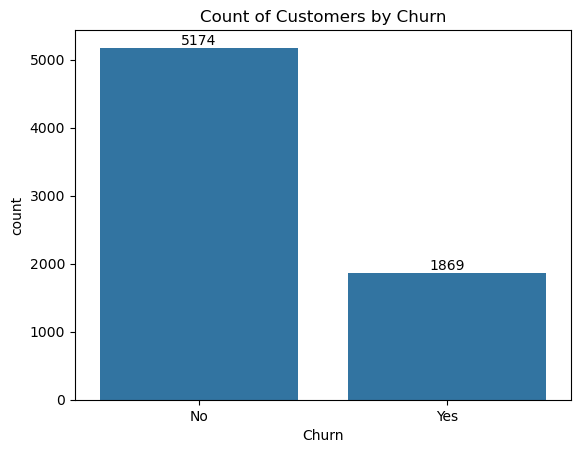

In [12]:
ax =sns.countplot(x= 'Churn' , data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

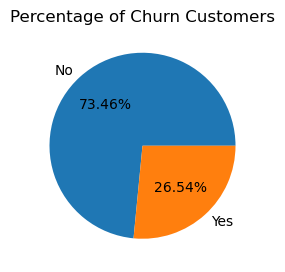

In [13]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churn Customers")
plt.show()

# FROM THE GIVEN PIE CHART WE CAN CONCLUDE THAT 26.54% OF OUR CUSTOMERS HAVE CHURNED OUT
# NOT LET'S EXPLORE THE REASON BEHIND IT

<function matplotlib.pyplot.show(close=None, block=None)>

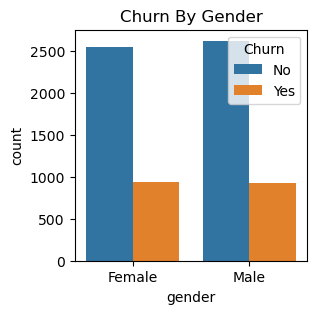

In [23]:
plt.figure(figsize=(3,3))
sns.countplot(x= "gender", data=df, hue = "Churn")
plt.title("Churn By Gender")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

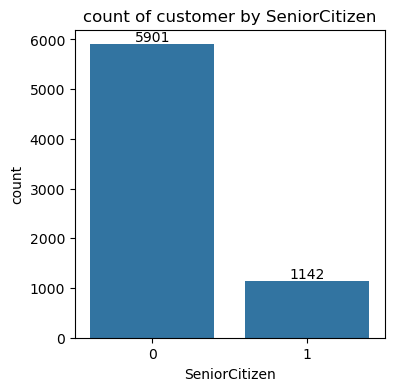

In [42]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x= "SeniorCitizen", data=df)

ax.bar_label(ax.containers[0])
plt.title("count of customer by SeniorCitizen")
plt.show

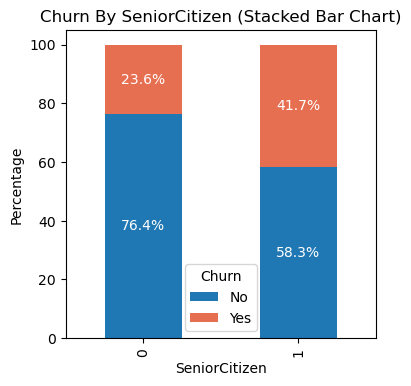

In [43]:
df_grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
df_grouped = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = df_grouped.plot(kind='bar', stacked=True, figsize=(4, 4), color=["#1f77b4", "#e76f51"])

# Add percentage labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_y() + height / 2.), 
                    ha='center', va='center', 
                    fontsize=10, color='white')

# Set the title and labels
plt.title("Churn By SeniorCitizen (Stacked Bar Chart)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen")

# Show plot
plt.show()

# comparitevely a greater percentage of people in senior citizen catagory have churned...

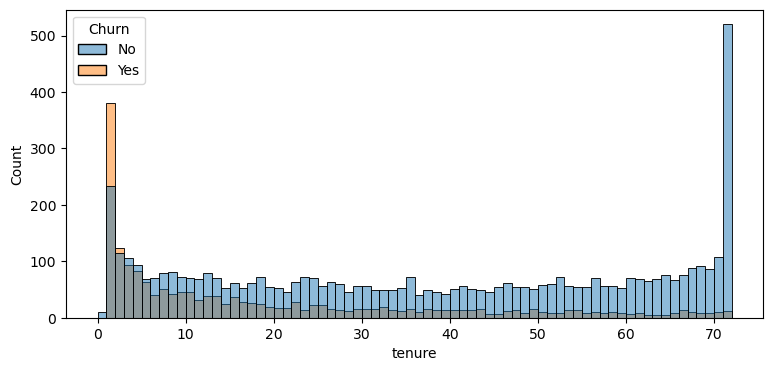

In [48]:
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure", data = df, bins=72, hue="Churn")
plt.show()

# people who used our services for a long time have stayed and people who have used our service 1 or 2 months have churned

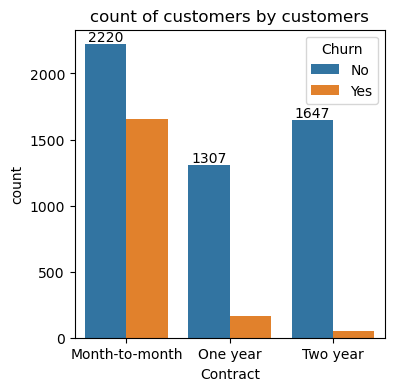

In [59]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x = "Contract", data=df , hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("count of customers by customers")
plt.show()

# people who have month to month contract are likely to churn then from those who have one or two year of contracts

In [60]:
df.columns

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

C:\Users\DeLL\AppData\Local\Temp\ipykernel_1540\1332579982.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel', ax=ax)
C:\Users\DeLL\AppData\Local\Temp\ipykernel_1540\1332579982.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-tick labels for readability
C:\Users\DeLL\AppData\Local\Temp\ipykernel_1540\1332579982.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='pastel', ax=ax)
C:\Users\DeLL\AppData\Local\Temp\ipykernel_1540\1332579982.py:31: UserWarning: s

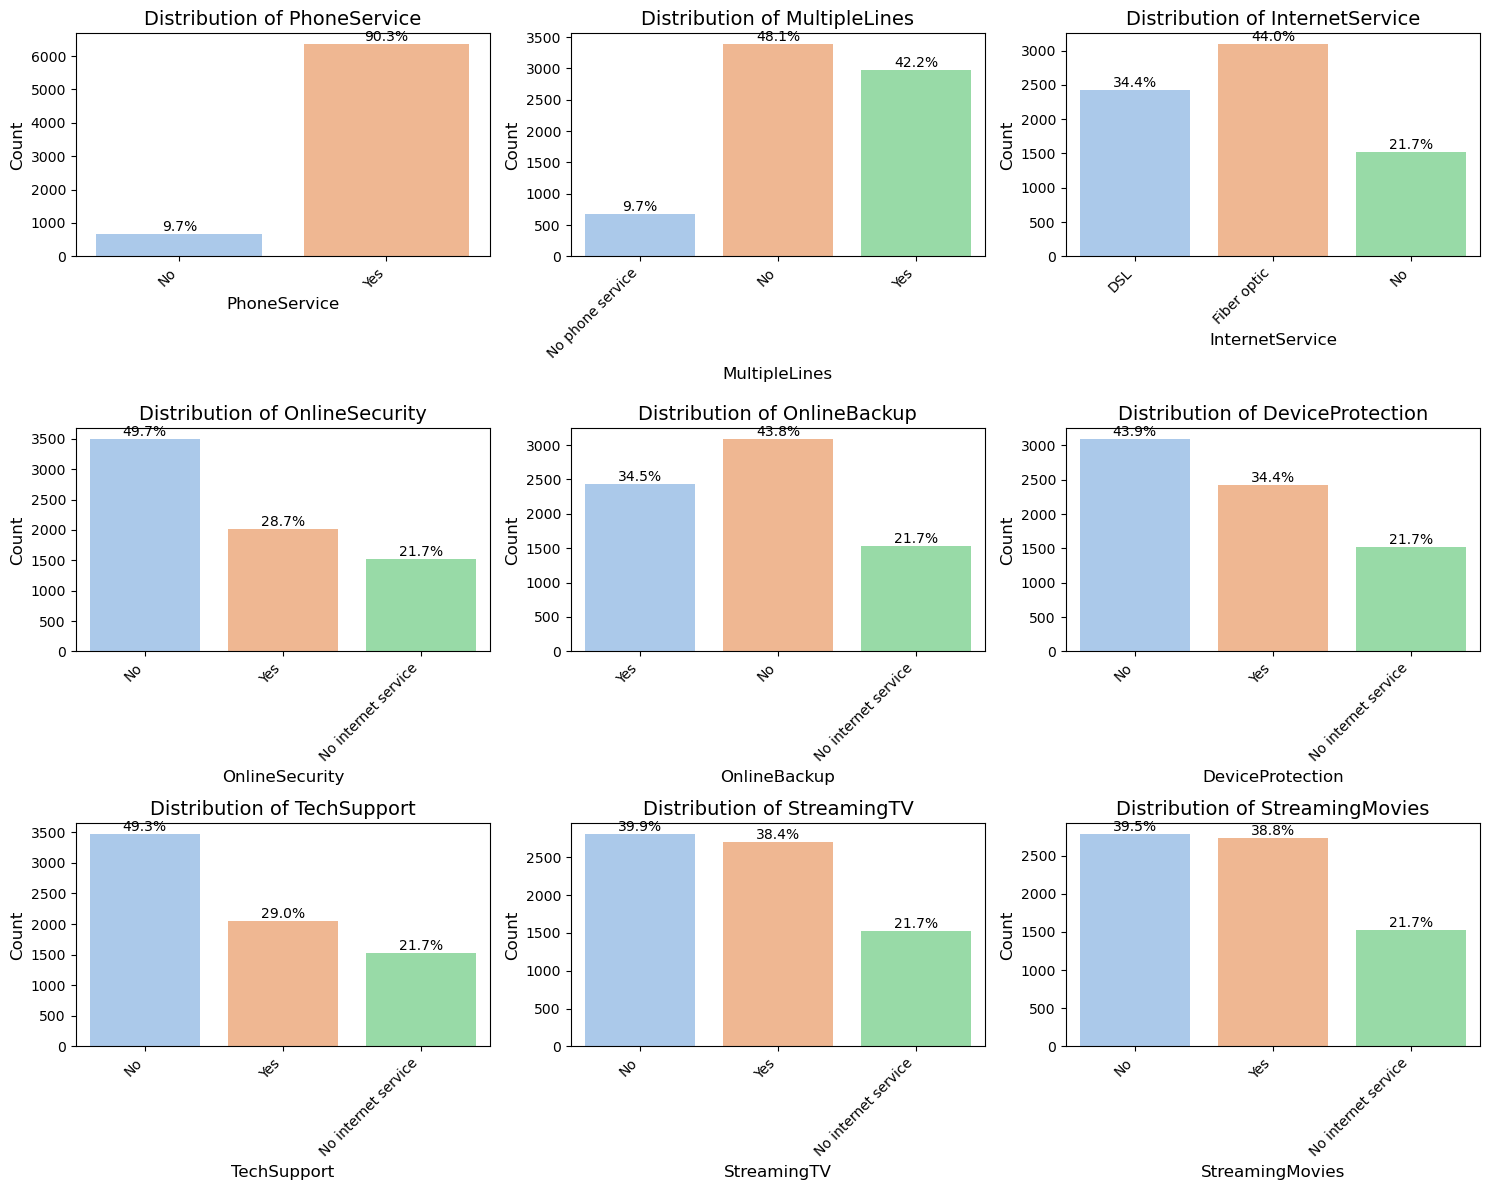

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns you want to plot
columns_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Create the figure with a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through each column and corresponding axis
for idx, (column, ax) in enumerate(zip(columns_to_plot, axes)):
    # Create the countplot
    sns.countplot(x=column, data=df, palette='pastel', ax=ax)
    
    # Calculate the percentages
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=10, color='black')
    
    # Set title and axis labels
    ax.set_title(f'Distribution of {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-tick labels for readability

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


#  Most users have phone services (90.3%), while internet-related add-ons like Online Security, Online Backup, and Device Protection have a significant portion of customers not subscribing (around 43-49%). Streaming services (TV & Movies) have similar adoption rates, with approximately 39% subscribing.

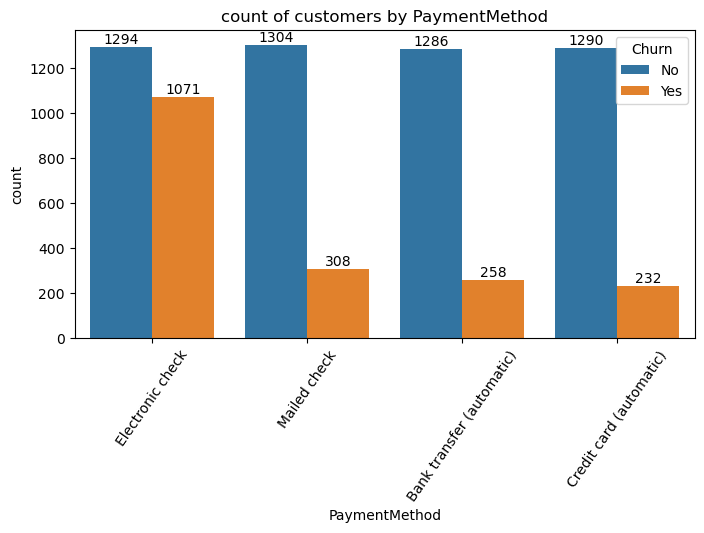

In [97]:
plt.figure(figsize=(8,4))
ax= sns.countplot(x = "PaymentMethod", data=df , hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("count of customers by PaymentMethod")
plt.xticks(rotation = 55)
plt.show()

# customer likely to churn when he using the electonic check  as payment method